<a href="https://colab.research.google.com/github/aToshihikoYamakami/wad-jp-adhoc/blob/master/fastai190322_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [13]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
bs = 64

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [15]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_126.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_10.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_165.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_92.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_100.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [19]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,samoyed,basset_hound,Abyssinian,Birman
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Bombay,yorkshire_terrier,Persian,Egyptian_Mau
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [20]:
imagenet_stats


([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [0]:
help(normalize)

Help on function normalize in module fastai.vision.data:

normalize(x:torch.Tensor, mean:torch.FloatTensor, std:torch.FloatTensor) -> torch.Tensor
    Normalize `x` with `mean` and `std`.



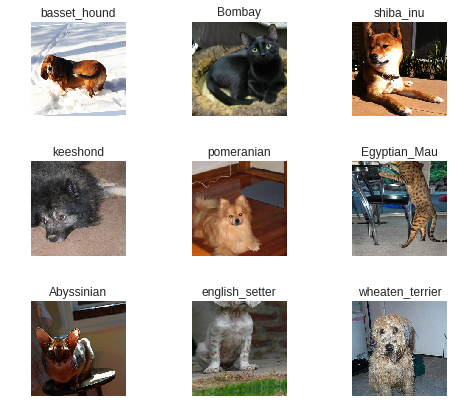

In [21]:
data.show_batch(rows=3, figsize=(7,6))


In [22]:
print(data.classes)
len(data.classes),data.c


['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

---
190322　まずはまったのはConvLearnerがcnn_learnerになっていたこと。。。
---



In [0]:
# ConvLearner is now "cnn_learner"
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [25]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.420538,0.331324,0.097429,01:58
1,0.544330,0.248355,0.085927,01:57
2,0.331437,0.203751,0.071042,01:56
3,0.257830,0.193751,0.061570,01:57


In [0]:
learn.save('stage-1')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


In [0]:
doc(interp.plot_top_losses)


In [27]:
interp.most_confused(min_val=2)


[('Ragdoll', 'Birman', 8),
 ('Egyptian_Mau', 'Bengal', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Birman', 'Ragdoll', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'boxer', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('yorkshire_terrier', 'havanese', 2)]

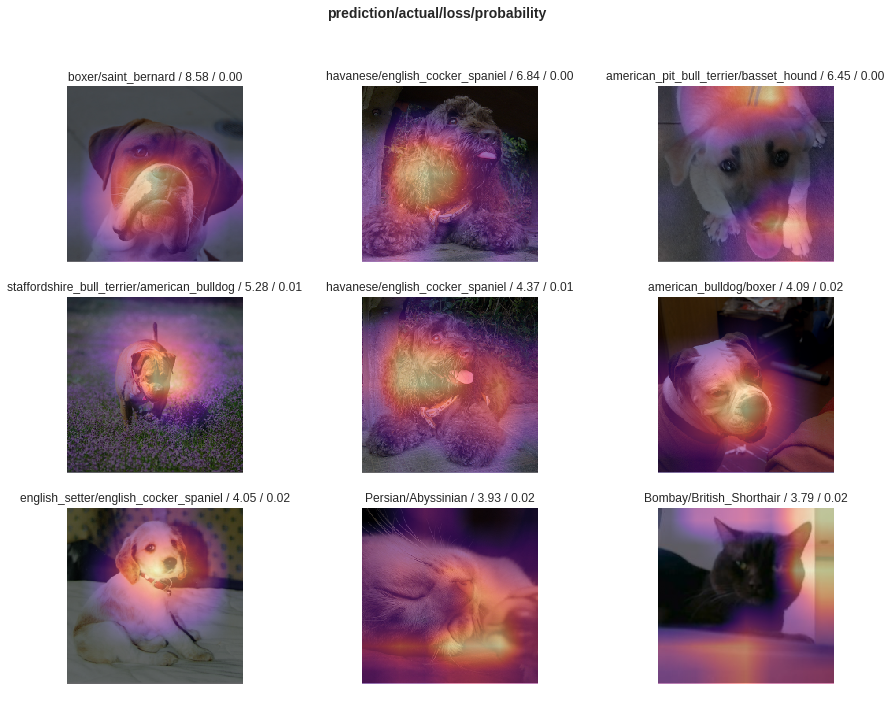

In [28]:
interp.plot_top_losses(9, figsize=(15,11))


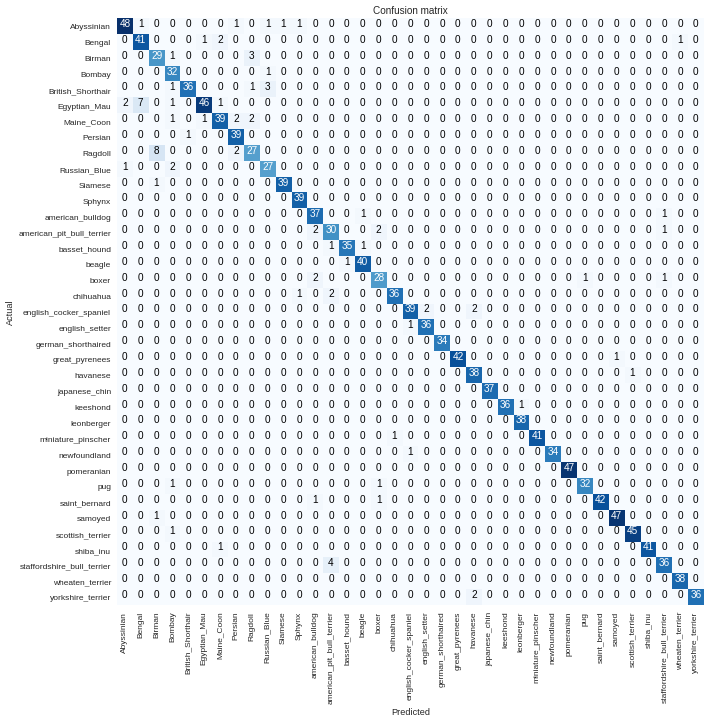

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.528323,0.351976,0.107578,02:04


In [0]:
learn.load('stage-1')


Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Russian_Blue,american_pit_bull_terrier,english_cocker_spaniel,Russian_Blue,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wheaten_terrier,leonberger,wheaten_terrier,Siamese,Birman
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(6

In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


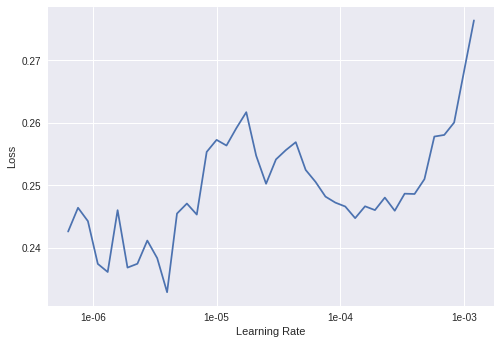

In [0]:
learn.recorder.plot()


In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-6))


epoch,train_loss,valid_loss,error_rate,time
0,0.216595,0.196504,0.065629,02:02


KeyboardInterrupt: ignored

In [35]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-6))

epoch,train_loss,valid_loss,error_rate,time


Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken p

KeyboardInterrupt: ignored

In [0]:
# Training resnet50
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


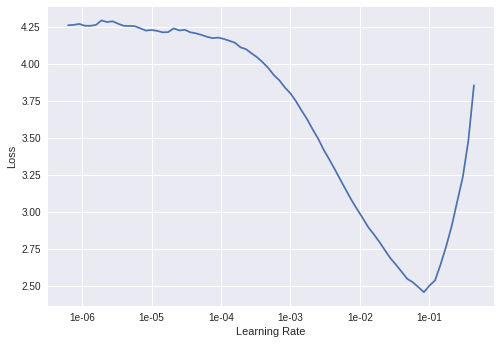

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.726203,0.249793,0.081867,03:28
1,0.395597,0.202094,0.069689,03:22
2,0.328908,0.217835,0.079838,03:22
3,0.296228,0.195018,0.061570,03:23
4,0.216026,0.179817,0.052097,03:22
5,0.157002,0.166495,0.053451,03:23
6,0.132787,0.152492,0.047361,03:23
7,0.087510,0.151440,0.047361,03:25


In [0]:
learn.save('stage-1-50') # save resnet50 model

In [40]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4)) # fine tuning

epoch,train_loss,valid_loss,error_rate,time
0,0.092409,0.156042,0.050744,04:22
1,0.093446,0.147343,0.048038,04:16
2,0.081553,0.149192,0.049391,04:16


In [0]:

learn.load('stage-1-50');

In [0]:

interp = ClassificationInterpretation.from_learner(learn)

In [43]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('Birman', 'Ragdoll', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('beagle', 'basset_hound', 3),
 ('Abyssinian', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Ragdoll', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

In [44]:
## other format using MNIST
path = untar_data(URLs.MNIST_SAMPLE); path


PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms=get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)


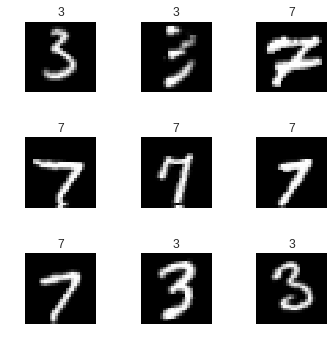

In [46]:
data.show_batch(rows=3,figsize=(5,5))


In [47]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)


epoch,train_loss,valid_loss,accuracy,time
0,0.165496,0.070856,0.976938,00:23
1,0.102996,0.044697,0.985770,00:23


In [48]:
df = pd.read_csv(path/'labels.csv')
df.head()



,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)


[0, 1]

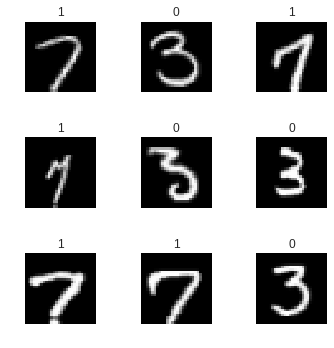

In [50]:
data.show_batch(rows=3, figsize=(5,5))
data.classes


In [51]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-5))


epoch,train_loss,valid_loss,accuracy,time
0,0.089554,0.039160,0.990677,00:24
1,0.080392,0.038077,0.990186,00:23


In [0]:
# 1e-3


0.001

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-5))


epoch,train_loss,valid_loss,error_rate,time
0,0.137956,0.199427,0.067659,02:05
1,0.123989,0.188831,0.060217,02:05


In [52]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes


[0, 1]

In [53]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]


[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [54]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [55]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [56]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [57]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [0]:
from PIL import Image

In [0]:
a = 1
b = a + 1
c = a + b + 1
d = a + b + c + 1
a, b, c, d


(1, 2, 4, 8)

<function matplotlib.pyplot.show>

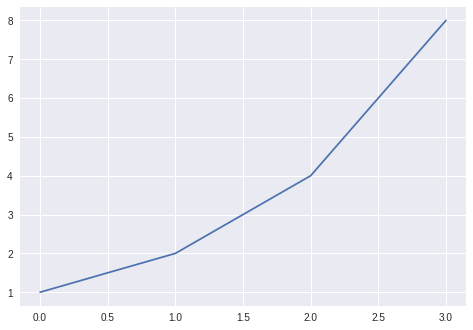

In [0]:
plt.plot([a, b, c, d])
plt.show
